# Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [ ]:
import pprint

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
import pickle

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from imblearn.over_sampling import (
  RandomOverSampler,
  SMOTE,
  ADASYN,
  BorderlineSMOTE,
  SVMSMOTE,
  KMeansSMOTE)

In [ ]:
from imblearn.under_sampling import (
  RandomUnderSampler,
  NearMiss,
  ClusterCentroids,
  TomekLinks,
  EditedNearestNeighbours,
  CondensedNearestNeighbour,
  RepeatedEditedNearestNeighbours)

In [ ]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [ ]:
from collections import Counter

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, precision_score, f1_score, average_precision_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelBinarizer

In [ ]:
import itertools

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Read Data

In [ ]:
input_folder_path = "/content/drive/MyDrive/Du_An_CNTT/Data/diabetes_012_health_indicators_BRFSS2021.csv"

In [ ]:
df = pd.read_csv(input_folder_path)
df.shape

(236378, 22)

# EDA

In [ ]:
df.head().T

,0,1,2,3,4
Diabetes_012,0.0,2.0,2.0,2.0,0.0
HighBP,0.0,1.0,1.0,0.0,0.0
HighChol,1.0,0.0,1.0,1.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,15.0,28.0,33.0,29.0,24.0
Smoker,1.0,0.0,0.0,0.0,1.0
Stroke,0.0,0.0,0.0,1.0,0.0
HeartDiseaseorAttack,0.0,1.0,0.0,1.0,0.0
PhysActivity,0.0,0.0,1.0,1.0,0.0
Fruits,1.0,1.0,1.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,236378.0,0.307791,0.705037,0.0,0.0,0.0,0.0,2.0
HighBP,236378.0,0.418558,0.493324,0.0,0.0,0.0,1.0,1.0
HighChol,236378.0,0.402059,0.490315,0.0,0.0,0.0,1.0,1.0
CholCheck,236378.0,0.963347,0.187909,0.0,1.0,1.0,1.0,1.0
BMI,236378.0,28.953579,6.552055,12.0,24.0,28.0,32.0,99.0
Smoker,236378.0,0.411997,0.492196,0.0,0.0,0.0,1.0,1.0
Stroke,236378.0,0.038900,0.193356,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,236378.0,0.086548,0.281172,0.0,0.0,0.0,0.0,1.0
PhysActivity,236378.0,0.779231,0.414766,0.0,1.0,1.0,1.0,1.0
Fruits,236378.0,0.621259,0.485074,0.0,0.0,1.0,1.0,1.0


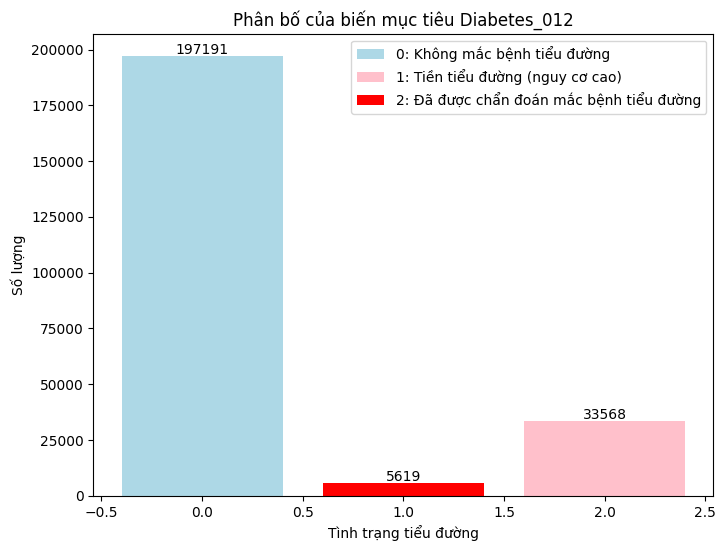

In [ ]:
counts = df['Diabetes_012'].value_counts()
labels = counts.index
values = counts.values

plt.figure(figsize=(8, 6))
plt.bar(labels[0],
        values[0],
        color='lightblue',
        label='0: Không mắc bệnh tiểu đường')

plt.bar(labels[1],
        values[1],
        color='pink',
        label='1: Tiền tiểu đường (nguy cơ cao)')

plt.bar(labels[2],
        values[2],
        color='red',
        label='2: Đã được chẩn đoán mắc bệnh tiểu đường')

for i, value in enumerate(values):
    plt.text(labels[i],
             value + 1000,
             str(value),
             ha='center',
             fontsize=10,
             color='black')

plt.title('Phân bố của biến mục tiêu Diabetes_012')
plt.xlabel('Tình trạng tiểu đường')
plt.ylabel('Số lượng')

plt.legend()

plt.show()

# Pre-Processing


In [ ]:
target_feature = "Diabetes_012"
numerical_features = ["BMI", "MentHlth", "PhysHlth"]
ordinal_features = ['GenHlth', 'Age', 'Education', 'Income']
binary_features = list(df.drop(numerical_features + ordinal_features + [target_feature], axis=1).columns)

## Data type

In [ ]:
df = df.astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          236378 non-null  int32
 1   HighBP                236378 non-null  int32
 2   HighChol              236378 non-null  int32
 3   CholCheck             236378 non-null  int32
 4   BMI                   236378 non-null  int32
 5   Smoker                236378 non-null  int32
 6   Stroke                236378 non-null  int32
 7   HeartDiseaseorAttack  236378 non-null  int32
 8   PhysActivity          236378 non-null  int32
 9   Fruits                236378 non-null  int32
 10  Veggies               236378 non-null  int32
 11  HvyAlcoholConsump     236378 non-null  int32
 12  AnyHealthcare         236378 non-null  int32
 13  NoDocbcCost           236378 non-null  int32
 14  GenHlth               236378 non-null  int32
 15  MentHlth              236378 non-n

## Missing Values

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## Delete Duplicates

In [ ]:
df.duplicated().sum()

12828

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(223550, 22)

## Outliers

In [ ]:
def IQR_method(df, n, features):

    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_list.extend(outlier_list_column)

    outlier_list = Counter(outlier_list)
    multiple_outliers = list(k for k, v in outlier_list.items() if v > n)

    return multiple_outliers

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove('Diabetes_012')

Outliers_IQR = IQR_method(df,1,numeric_columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

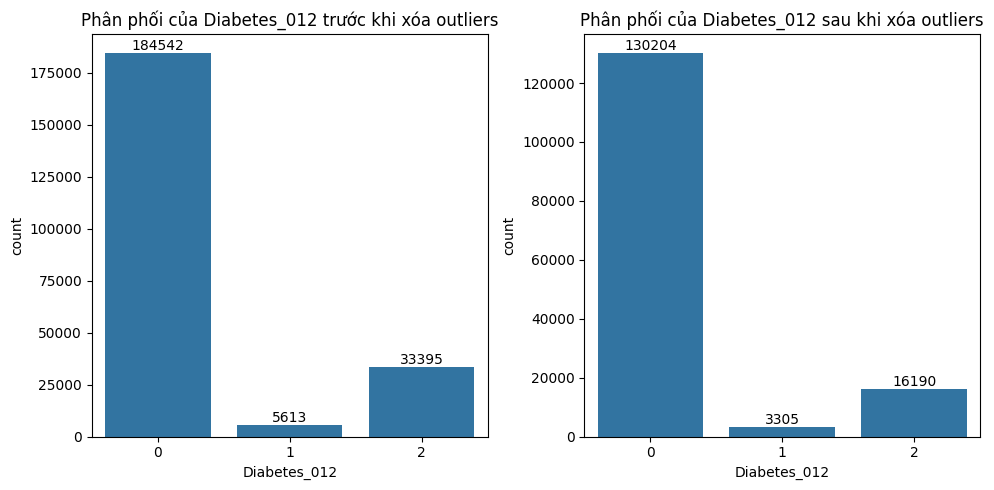

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Diabetes_012', data=df, ax=axes[0])
axes[0].set_title('Phân phối của Diabetes_012 trước khi xóa outliers')
for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.countplot(x='Diabetes_012', data=df_out, ax=axes[1])
axes[1].set_title('Phân phối của Diabetes_012 sau khi xóa outliers')
for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.tight_layout()
plt.show()

## Split Data

In [ ]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
scaler = MinMaxScaler()

X_train[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(X_train[['BMI', 'MentHlth', 'PhysHlth']])

X_test[['BMI', 'MentHlth', 'PhysHlth']] = scaler.transform(X_test[['BMI', 'MentHlth', 'PhysHlth']])

In [ ]:
print("y_train:", Counter(y_train))

y_train: Counter({0: 147634, 2: 26716, 1: 4490})


In [ ]:
print("y_test:",Counter(y_test))

y_test: Counter({0: 36908, 2: 6679, 1: 1123})


# Resample

## Over-sampling

In [ ]:
oversampling_techniques = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'KMeansSMOTE': KMeansSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42),
}

## Under-sampling

In [ ]:
undersampling_techniques = {
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'ClusterCentroids': ClusterCentroids(random_state=42),
    'NearMiss': NearMiss(),
    'TomekLinks': TomekLinks(),
    'EditedNearestNeighbours': EditedNearestNeighbours(),
}

## Combine-sampling

In [ ]:
combinesampling_techniques = {
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
}

## Parameters

In [ ]:
balancing_param_grids = {
    'RandomOverSampler': {
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
    'SMOTE': {
        'k_neighbors': [3, 5, 7],
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
    'ADASYN': {
        'n_neighbors': [3, 5, 7],
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
    'BorderlineSMOTE': {
        'k_neighbors': [3, 5, 7],
        'm_neighbors': [5, 10],
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
    'KMeansSMOTE': {
        'cluster_balance_threshold': [0.01, 0.03],
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
    'SVMSMOTE': {
        'k_neighbors': [3, 5],
        'm_neighbors': [5, 10],
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
    'RandomUnderSampler': {
        'sampling_strategy': ['auto', 'majority', 'not majority']
    },
    'ClusterCentroids': {
        'sampling_strategy': ['auto', 'majority', 'not majority']
    },
    'NearMiss': {
        'version': [1, 3],
        'n_neighbors': [3, 5, 7]
    },
    'TomekLinks': {
        'sampling_strategy': ['auto', 'majority', 'not majority']
    },
    'EditedNearestNeighbours': {
        'n_neighbors': [3, 5, 7],
        'sampling_strategy': ['auto', 'majority']
    },
    'RepeatedEditedNearestNeighbours': {
        'n_neighbors': [3, 5, 7],
        'sampling_strategy': ['auto', 'majority']
    },
    'SMOTEENN': {
        'smote': [SMOTE(k_neighbors=k, random_state=42) for k in [3, 5, 7]],
        'enn': [EditedNearestNeighbours(n_neighbors=n) for n in [3, 5, 7]],
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
    'SMOTETomek': {
        'smote': [SMOTE(k_neighbors=k, random_state=42) for k in [3, 5, 7]],
        'tomek': [TomekLinks(sampling_strategy=s) for s in ['auto', 'majority', 'not majority']],
        'sampling_strategy': ['auto', 'minority', 'not minority']
    },
}

## Function

In [ ]:
def save_resampled_data(X_resampled, y_resampled, file_path):
  os.makedirs(os.path.dirname(file_path), exist_ok=True)
  with open(file_path, 'wb') as f:
    pickle.dump((X_resampled, y_resampled), f)

In [ ]:
def load_resampled_data(file_path):
  with open(file_path, 'rb') as f:
    X_resampled, y_resampled = pickle.load(f)
  return X_resampled, y_resampled

In [ ]:
def resample_and_save_all(X_train, y_train, techniques, output_dir):
    resampled_data = {}
    for technique_name, technique in techniques.items():

        # Lấy tất cả các giá trị tham số
        param_values = [v for v in balancing_param_grids[technique_name].values()]

        # Tạo tất cả các tổ hợp tham số
        for param_combination in itertools.product(*param_values):
            # Tạo dictionary chứa tham số và giá trị tương ứng
            param_dict = dict(zip(balancing_param_grids[technique_name].keys(), param_combination))

            # Tạo tên file dựa trên kỹ thuật và tham số
            file_name = f"{technique_name}_" + "_".join([f"{k}_{v}" for k, v in param_dict.items()]) + ".pkl"
            file_path = os.path.join(output_dir, file_name)

            if os.path.exists(file_path):
                print(f"Loading pre-resampled data for {technique_name} with {param_dict}...")
                X_train_resampled, y_train_resampled = load_resampled_data(file_path)
                # print(Counter(y_train_resampled), '\n')
            else:
                print(f"Resampling data using {technique_name} with {param_dict}...")
                # Thiết lập tham số cho kỹ thuật cân bằng
                technique.set_params(**param_dict)
                X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)
                print(Counter(y_train_resampled), '\n')
                save_resampled_data(X_train_resampled, y_train_resampled, file_path)

            # Lưu dữ liệu đã được cân bằng vào dictionary
            resampled_data[file_name[:-4]] = (X_train_resampled, y_train_resampled)

    return resampled_data

# Train Models


## Models

In [ ]:
param_grid_rf = {
    'model__n_estimators': [200, 300],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [5, 10],
}

param_grid_ada = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.1, 0.5],
}

param_grid_hgb = {
    'model__learning_rate': [0.1, 0.01],
    'model__max_iter': [200, 300],
}

param_grid_knn = {
    'model__n_neighbors': [5, 7],
    'model__weights': ['uniform', 'distance'],
}

param_grids = {
    'Random Forest': param_grid_rf,
    'AdaBoost': param_grid_ada,
    'HistGradientBoosting': param_grid_hgb,
    'kNN': param_grid_knn,
}

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'kNN': KNeighborsClassifier()
}

## Function

In [ ]:
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):

    pipeline = Pipeline([('model', model)])

    grid_search = GridSearchCV(pipeline, param_grid, scoring=make_scorer(recall_score, average='weighted'), cv=5)

    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)

    # Tính ROC AUC cho từng lớp và trung bình vĩ mô (macro-average)
    lb = LabelBinarizer()
    y_test_onehot = lb.fit_transform(y_test)
    roc_auc_classes = {}
    for i in range(y_test_onehot.shape[1]):
        roc_auc_classes[lb.classes_[i]] = roc_auc_score(y_test_onehot[:, i], y_pred_proba[:, i])
    roc_auc_macro = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

    # Tính Average Precision cho từng lớp và trung bình vĩ mô (macro-average)
    avg_precision_classes = {}
    for i in range(y_test_onehot.shape[1]):
        avg_precision_classes[lb.classes_[i]] = average_precision_score(y_test_onehot[:, i], y_pred_proba[:, i])
    avg_precision_macro = average_precision_score(y_test_onehot, y_pred_proba, average='macro')

    # Tính precision, recall, F1-score cho từng lớp và trung bình vĩ mô (macro-average)
    report_dict = classification_report_imbalanced(y_test, y_pred, output_dict=True)

    result = {
        'Best_Params': best_params,
        'ROC_AUC_Macro': roc_auc_macro,
    }

    # Thêm ROC AUC cho từng lớp vào result
    result.update({f'ROC_AUC_{label}': roc_auc for label, roc_auc in roc_auc_classes.items()})

    # Thêm Average Precision cho từng lớp và trung bình vĩ mô vào result
    result.update({f'Average_Precision_{label}': avg_precision for label, avg_precision in avg_precision_classes.items()})
    result['Average_Precision_Macro'] = avg_precision_macro

    for metric in ['pre', 'rec', 'f1']:
        for label in [0, 1, 2]:
            result[f'{metric.capitalize()}_{label}'] = report_dict[str(label)][metric]
        avg_metric = np.mean([report_dict[str(label)][metric] for label in [0, 1, 2]])
        result[f'Average {metric.capitalize()}'] = avg_metric

    return result

In [ ]:
def train_all_models(models, X_train, y_train, X_test, y_test, resampled_data, result_file):

    try:
        existing_results = pd.read_csv(result_file)
        trained_combinations = set(zip(existing_results['Model'], existing_results['Technique']))
    except FileNotFoundError:
        trained_combinations = set()

    for model_name, model in models.items():
        if (model_name, 'Original Data') not in trained_combinations:
            print(f'Train {model_name} with Original Data')
            result = train_and_evaluate_model(model, param_grids[model_name], X_train, y_train, X_test, y_test)
            result['Model'] = model_name
            result['Technique'] = 'Original Data'

            df_result = pd.DataFrame([result])
            save_result(df_result, result_file)

            trained_combinations.add((model_name, 'Original Data'))

        for technique_name, (X_train_resampled, y_train_resampled) in resampled_data.items():
            if (model_name, technique_name) not in trained_combinations:
                print(f'Train {model_name} with {technique_name}')
                result = train_and_evaluate_model(model, param_grids[model_name], X_train_resampled, y_train_resampled, X_test, y_test)

                result['Model'] = model_name
                result['Technique'] = technique_name

                df_result = pd.DataFrame([result])
                save_result(df_result, result_file)

                trained_combinations.add((model_name, technique_name))


# Result

**Save result**

In [ ]:
def save_result(df, file_name):
  if os.path.exists(file_name):
      df.to_csv(file_name, mode='a', header=False, index=False)
  else:
      df.to_csv(file_name, index=False)

In [ ]:
new_order = ["Technique", 'Best_Params',
             'ROC_AUC_Macro', 'ROC_AUC_0', 'ROC_AUC_1', 'ROC_AUC_2',
             'Average_Precision_Macro', 'Average_Precision_0', 'Average_Precision_1', 'Average_Precision_2',
             'Average Pre', 'Pre_0', 'Pre_1', 'Pre_2',
             'Average Rec', 'Rec_0', 'Rec_1', 'Rec_2',
             'Average F1', 'F1_0', 'F1_1', 'F1_2']

## Result Resampled

In [ ]:
output_dir ='/content/drive/MyDrive/Du_An_CNTT/Result_test/result_resampled'
all_techniques = {**oversampling_techniques, **undersampling_techniques, **combinesampling_techniques}
resampled_data = resample_and_save_all(X_train, y_train, all_techniques, output_dir)

Loading pre-resampled data for RandomOverSampler with {'sampling_strategy': 'auto'}...
Loading pre-resampled data for RandomOverSampler with {'sampling_strategy': 'minority'}...
Loading pre-resampled data for RandomOverSampler with {'sampling_strategy': 'not minority'}...
Loading pre-resampled data for SMOTE with {'k_neighbors': 3, 'sampling_strategy': 'auto'}...
Loading pre-resampled data for SMOTE with {'k_neighbors': 3, 'sampling_strategy': 'minority'}...
Loading pre-resampled data for SMOTE with {'k_neighbors': 3, 'sampling_strategy': 'not minority'}...
Loading pre-resampled data for SMOTE with {'k_neighbors': 5, 'sampling_strategy': 'auto'}...
Loading pre-resampled data for SMOTE with {'k_neighbors': 5, 'sampling_strategy': 'minority'}...
Loading pre-resampled data for SMOTE with {'k_neighbors': 5, 'sampling_strategy': 'not minority'}...
Loading pre-resampled data for SMOTE with {'k_neighbors': 7, 'sampling_strategy': 'auto'}...
Loading pre-resampled data for SMOTE with {'k_neighb

## Result Train Models

In [ ]:
result_file = '/content/drive/MyDrive/Du_An_CNTT/Result_test/result_grid.csv'
all_results = train_all_models(models, X_train, y_train, X_test, y_test, resampled_data, result_file)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Du_An_CNTT/Result_test/result_grid.csv')
df.shape

(532, 23)

### Delete result 0

In [ ]:
filtered_df = df[((df[new_order] != 0).all(axis=1)) | (df['Technique'] == 'Original Data')]
filtered_df.shape

(448, 23)

In [ ]:
filtered_df = filtered_df.copy()
filtered_df['Technique_Name'] = filtered_df['Technique'].str.split('_').str[0]

In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/Du_An_CNTT/Result_test/filtered_result_grid.csv', index=False)

In [ ]:
filtered_df = pd.read_csv('/content/drive/MyDrive/Du_An_CNTT/Result_test/filtered_result_grid.csv')

In [ ]:
output_dir = '/content/drive/MyDrive/Du_An_CNTT/Result_test'

### Best ROC_AUC


In [ ]:
best_indices = filtered_df.groupby(['Model', 'Technique_Name'])['ROC_AUC_Macro'].idxmax()
best_roc_auc_macro_df = filtered_df.loc[best_indices]

In [ ]:
file_name = 'best_roc_auc_macro.csv'
file_path = os.path.join(output_dir, file_name)
best_roc_auc_macro_df.to_csv(file_path, index=False)

In [ ]:
technique_order = filtered_df['Technique_Name'].unique().tolist()

best_roc_auc_macro = filtered_df.groupby(['Model', 'Technique_Name'])['ROC_AUC_Macro'].max()

best_roc_auc_macro_df = best_roc_auc_macro.reset_index()

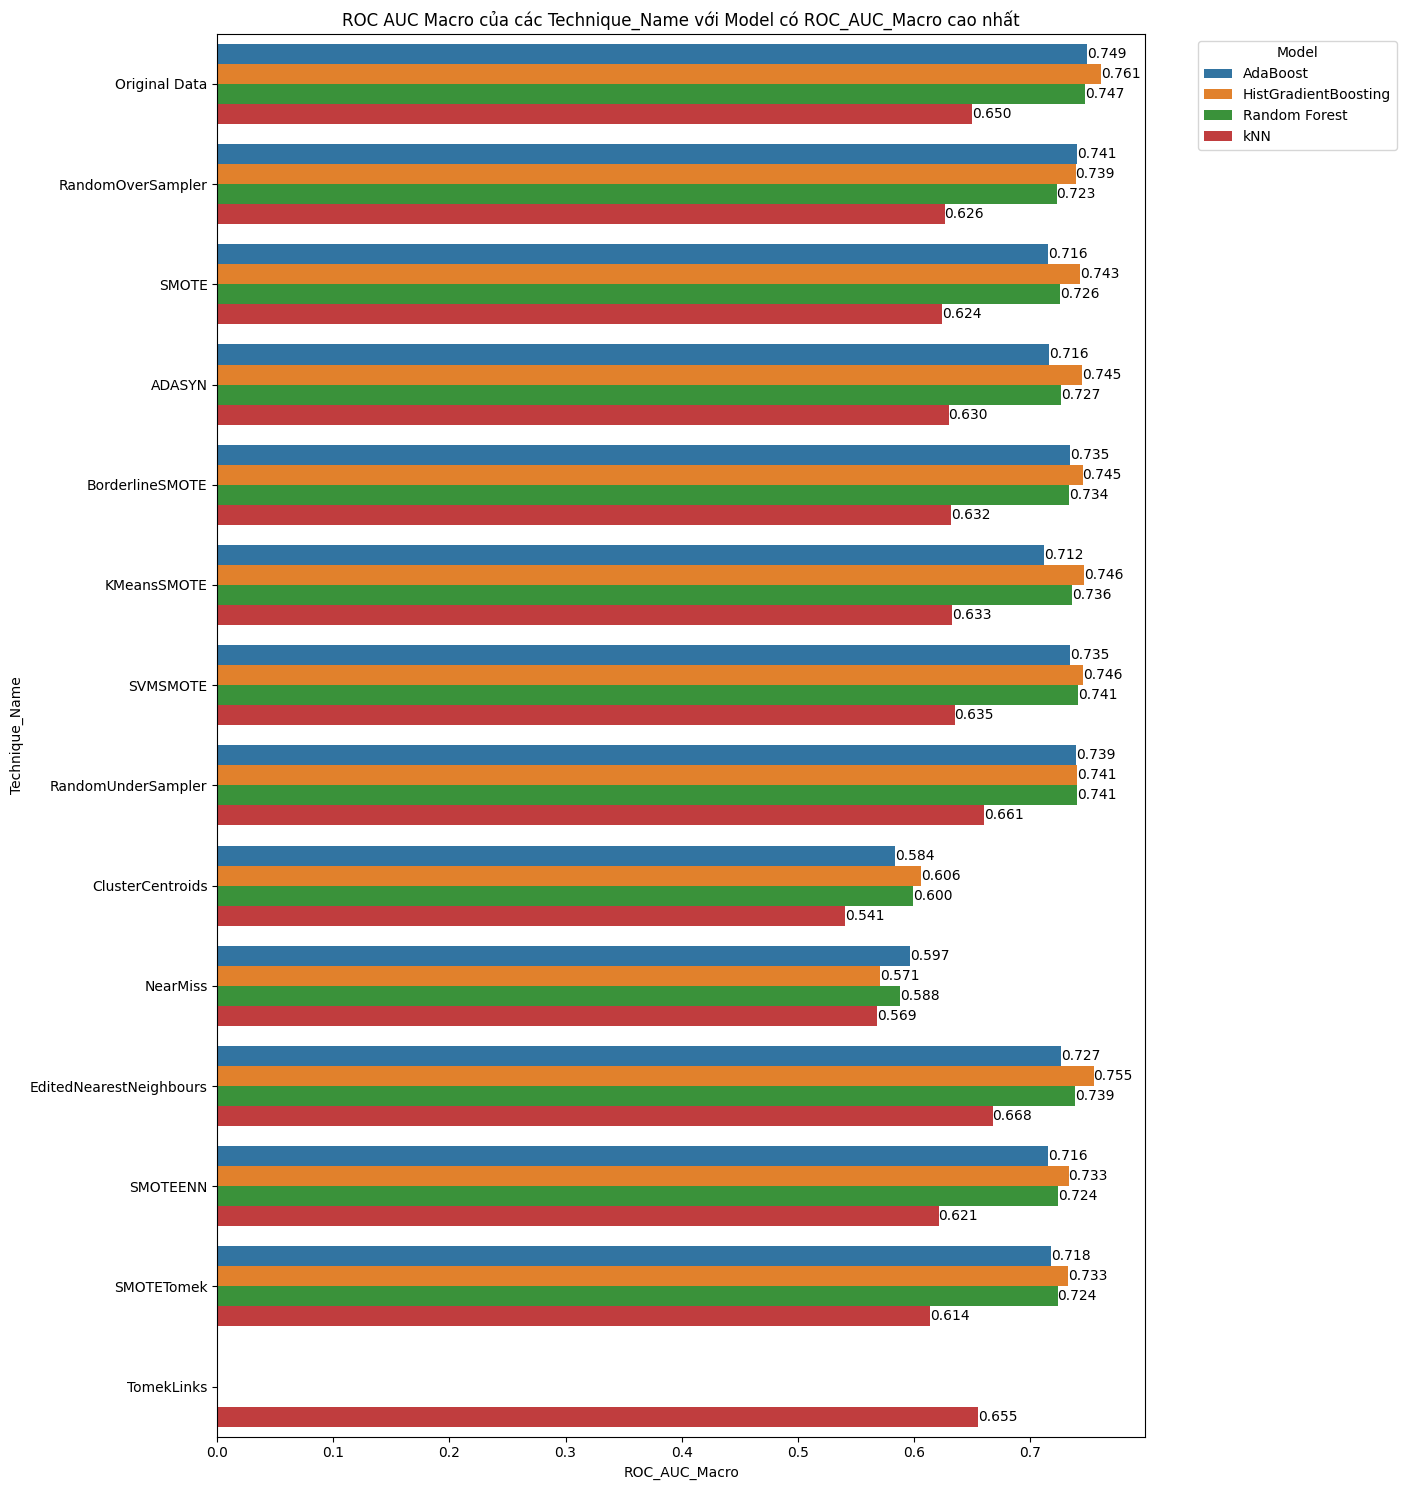

In [ ]:
fig, ax = plt.subplots(figsize=(18, 15))

sns.barplot(y='Technique_Name', x='ROC_AUC_Macro', hue='Model', data=best_roc_auc_macro_df, orient='h', ax=ax, order=technique_order)
ax.set_title('ROC AUC Macro của các Technique_Name với Model có ROC_AUC_Macro cao nhất')
ax.set_ylabel('Technique_Name')
ax.set_xlabel('ROC_AUC_Macro')

ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()

### Best Average Rec

In [ ]:
best_indices = filtered_df.groupby(['Model', 'Technique_Name'])['Average Rec'].idxmax()
best_avg_rec_df = filtered_df.loc[best_indices]

In [ ]:
file_name = 'best_avg_rec.csv'
file_path = os.path.join(output_dir, file_name)
best_avg_rec_df.to_csv(file_path, index=False)

In [ ]:
best_avg_rec = filtered_df.groupby(['Model', 'Technique_Name'])['Average Rec'].max()

best_avg_rec_df = best_avg_rec.reset_index()

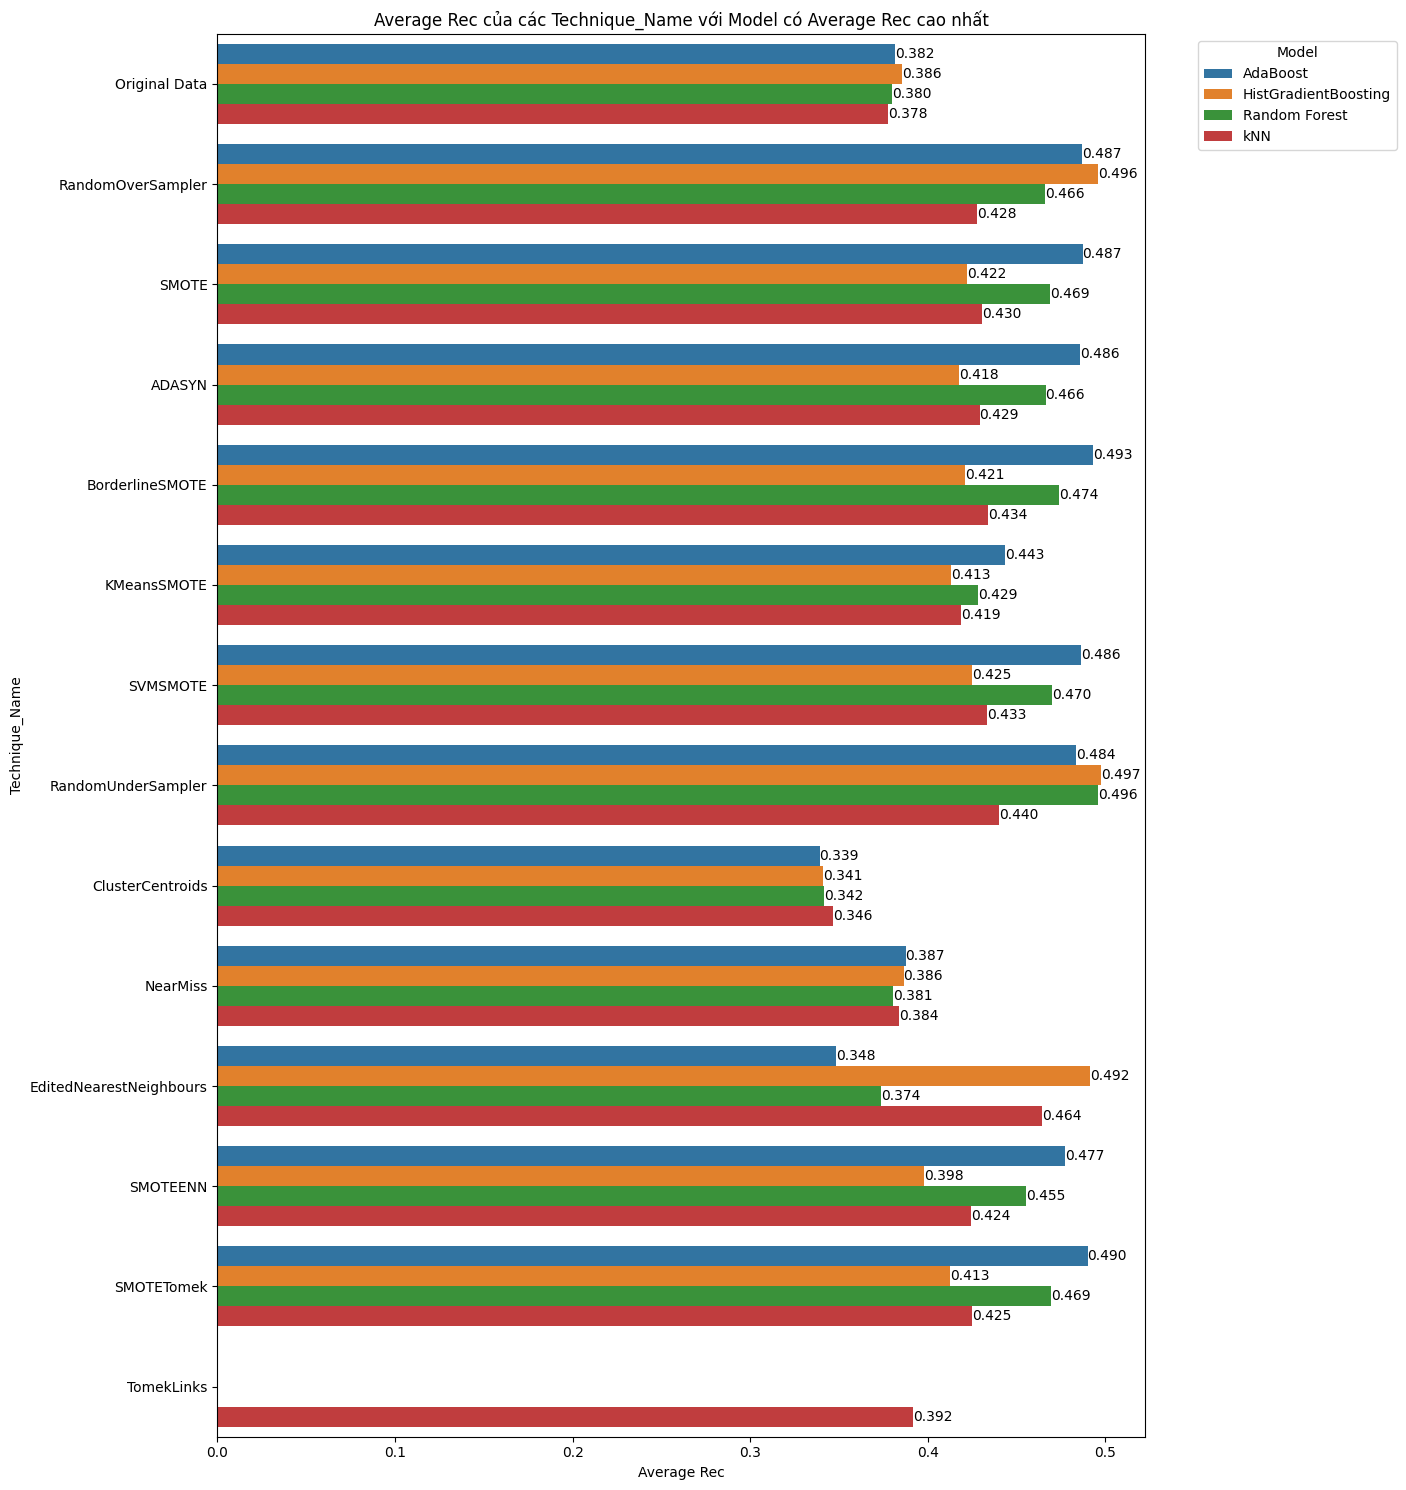

In [ ]:
fig, ax = plt.subplots(figsize=(18, 15))

sns.barplot(y='Technique_Name', x='Average Rec', hue='Model', data=best_avg_rec_df, orient='h', ax=ax, order=technique_order)
ax.set_title('Average Rec của các Technique_Name với Model có Average Rec cao nhất')
ax.set_ylabel('Technique_Name')
ax.set_xlabel('Average Rec')

ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()

### Best Average Pre

In [ ]:
best_indices = filtered_df.groupby(['Model', 'Technique_Name'])['Average Pre'].idxmax()
best_avg_pre_df = filtered_df.loc[best_indices]

In [ ]:
file_name = 'best_avg_pre.csv'
file_path = os.path.join(output_dir, file_name)
best_avg_pre_df.to_csv(file_path, index=False)

In [ ]:
best_avg_pre = filtered_df.groupby(['Model', 'Technique_Name'])['Average Pre'].max()

best_avg_pre_df = best_avg_pre.reset_index()

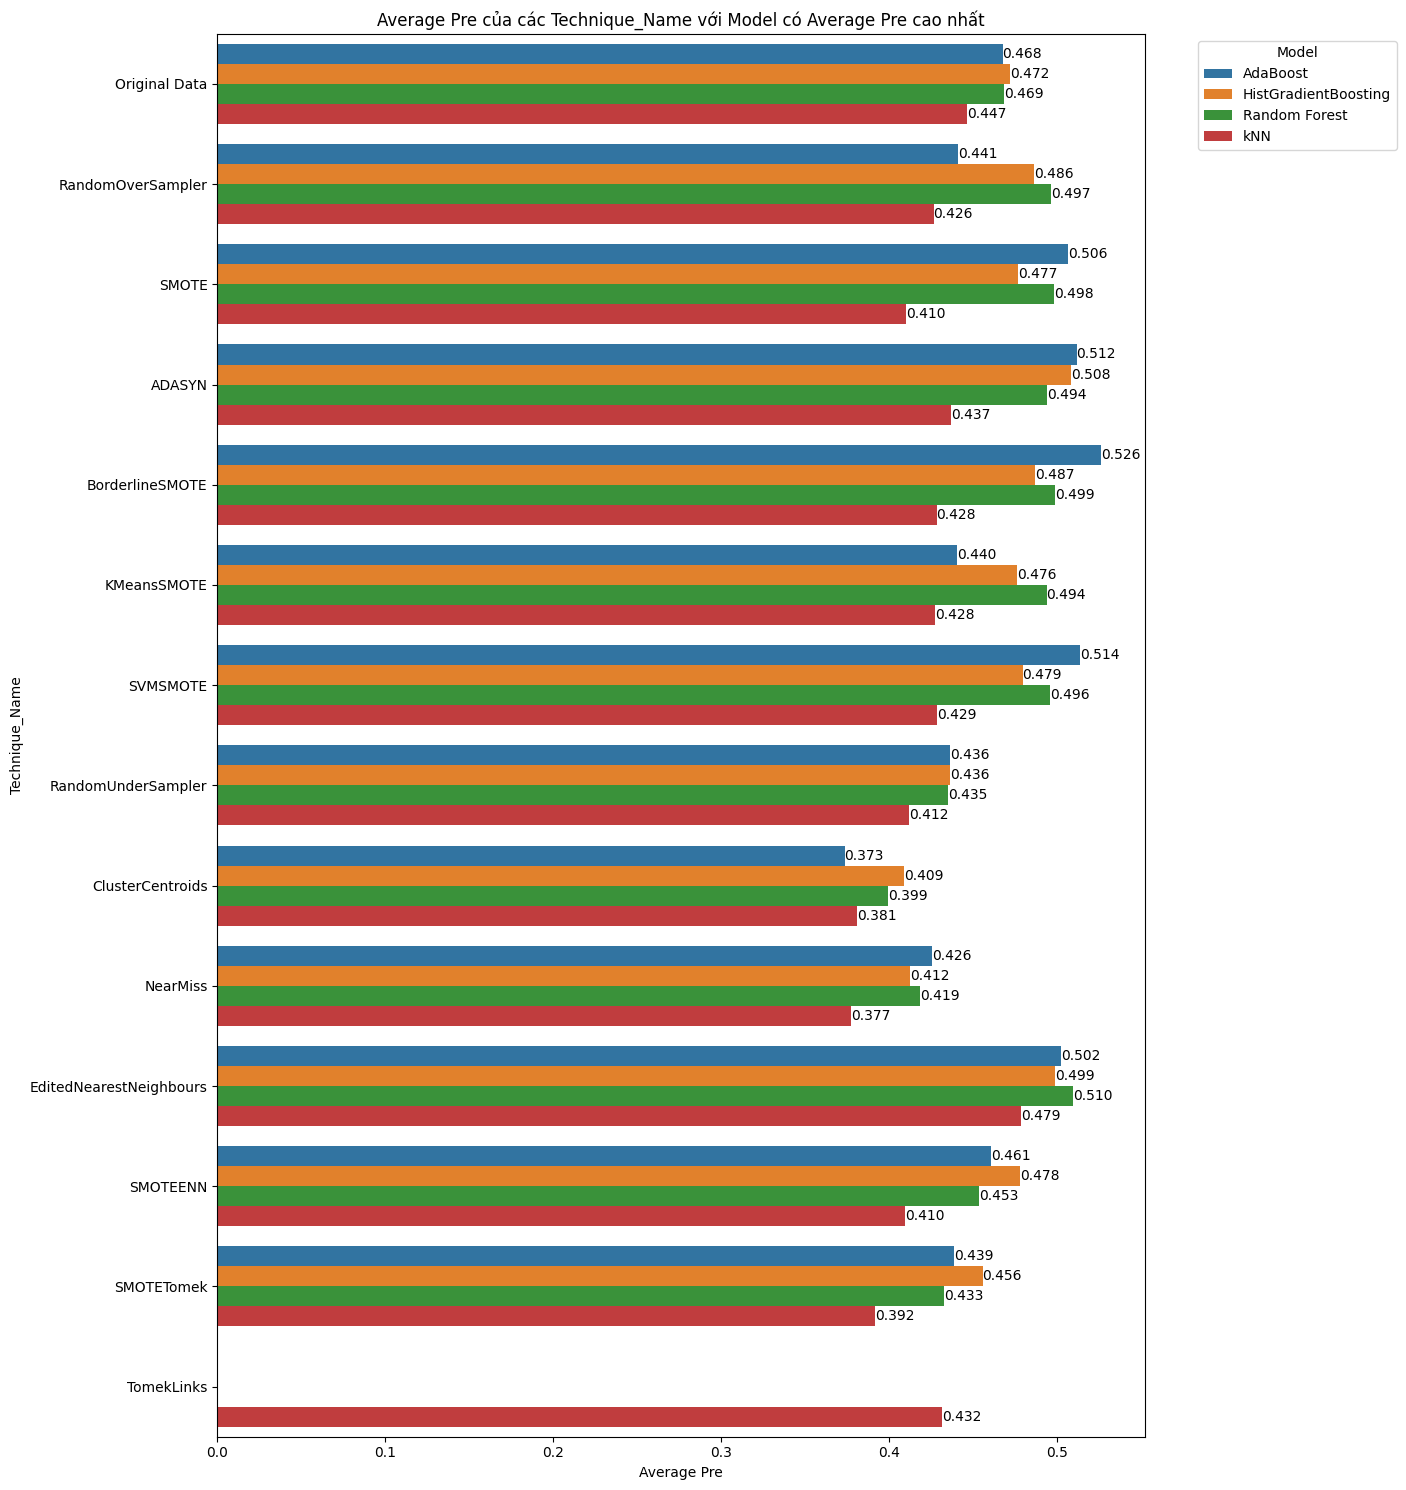

In [ ]:
fig, ax = plt.subplots(figsize=(18, 15))

sns.barplot(y='Technique_Name', x='Average Pre', hue='Model', data=best_avg_pre_df, orient='h', ax=ax, order=technique_order)
ax.set_title('Average Pre của các Technique_Name với Model có Average Pre cao nhất')
ax.set_ylabel('Technique_Name')
ax.set_xlabel('Average Pre')

ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()

### Best Average_Precision_Macro

In [ ]:
best_indices = filtered_df.groupby(['Model', 'Technique_Name'])['Average_Precision_Macro'].idxmax()
best_avg_pre_macro_df = filtered_df.loc[best_indices]

In [ ]:
file_name = 'best_avg_pre_macro.csv'
file_path = os.path.join(output_dir, file_name)
best_avg_pre_macro_df.to_csv(file_path, index=False)

In [ ]:
best_avg_pre_macro = filtered_df.groupby(['Model', 'Technique_Name'])['Average_Precision_Macro'].max()

best_avg_pre_macro_df = best_avg_pre_macro.reset_index()

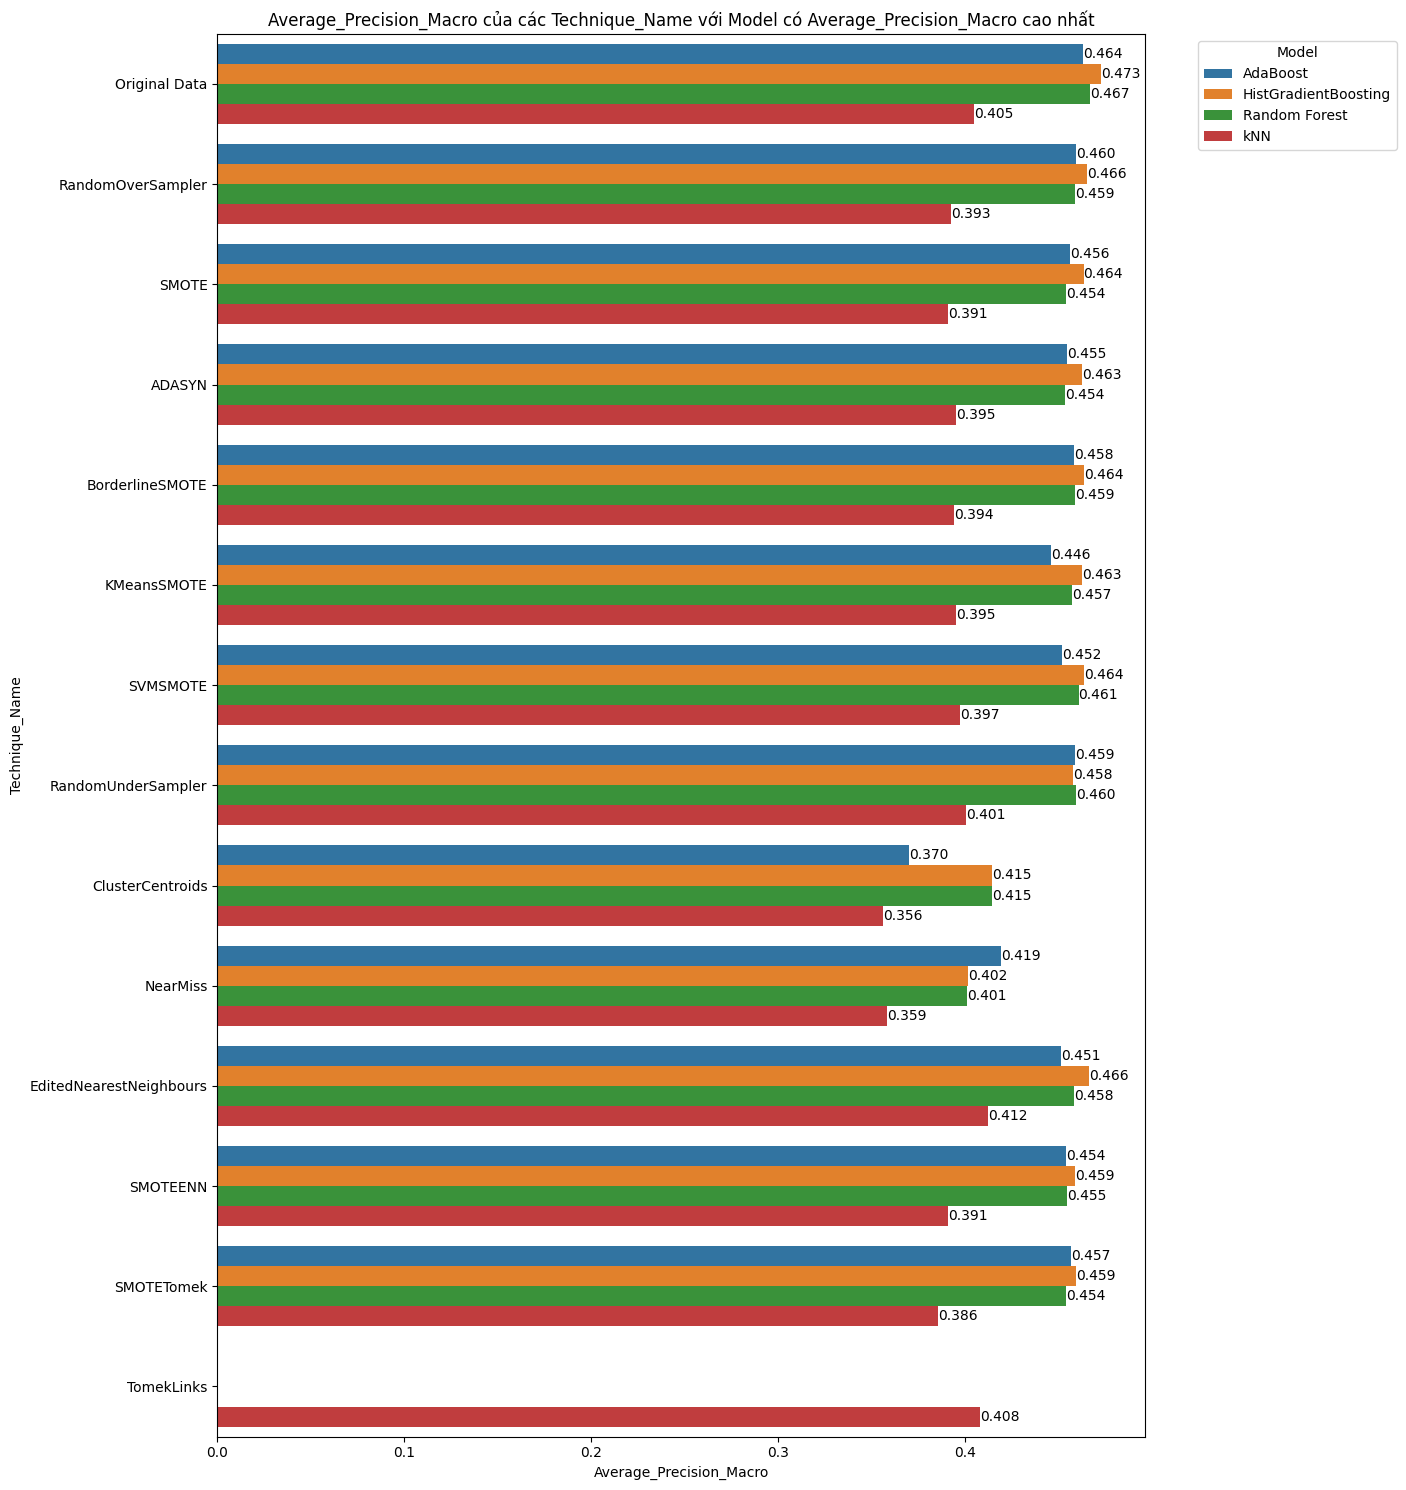

In [ ]:
fig, ax = plt.subplots(figsize=(18, 15))

sns.barplot(y='Technique_Name', x='Average_Precision_Macro', hue='Model', data=best_avg_pre_macro_df, orient='h', ax=ax, order=technique_order)
ax.set_title('Average_Precision_Macro của các Technique_Name với Model có Average_Precision_Macro cao nhất')
ax.set_ylabel('Technique_Name')
ax.set_xlabel('Average_Precision_Macro')

ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()

### Best F1-score

In [ ]:
best_indices = filtered_df.groupby(['Model', 'Technique_Name'])['Average F1'].idxmax()
best_avg_f1_df = filtered_df.loc[best_indices]

In [ ]:
file_name = 'best_avg_f1.csv'
file_path = os.path.join(output_dir, file_name)
best_avg_f1_df.to_csv(file_path, index=False)

In [ ]:
best_avg_f1 = filtered_df.groupby(['Model', 'Technique_Name'])['Average F1'].max()

best_avg_f1_df = best_avg_f1.reset_index()

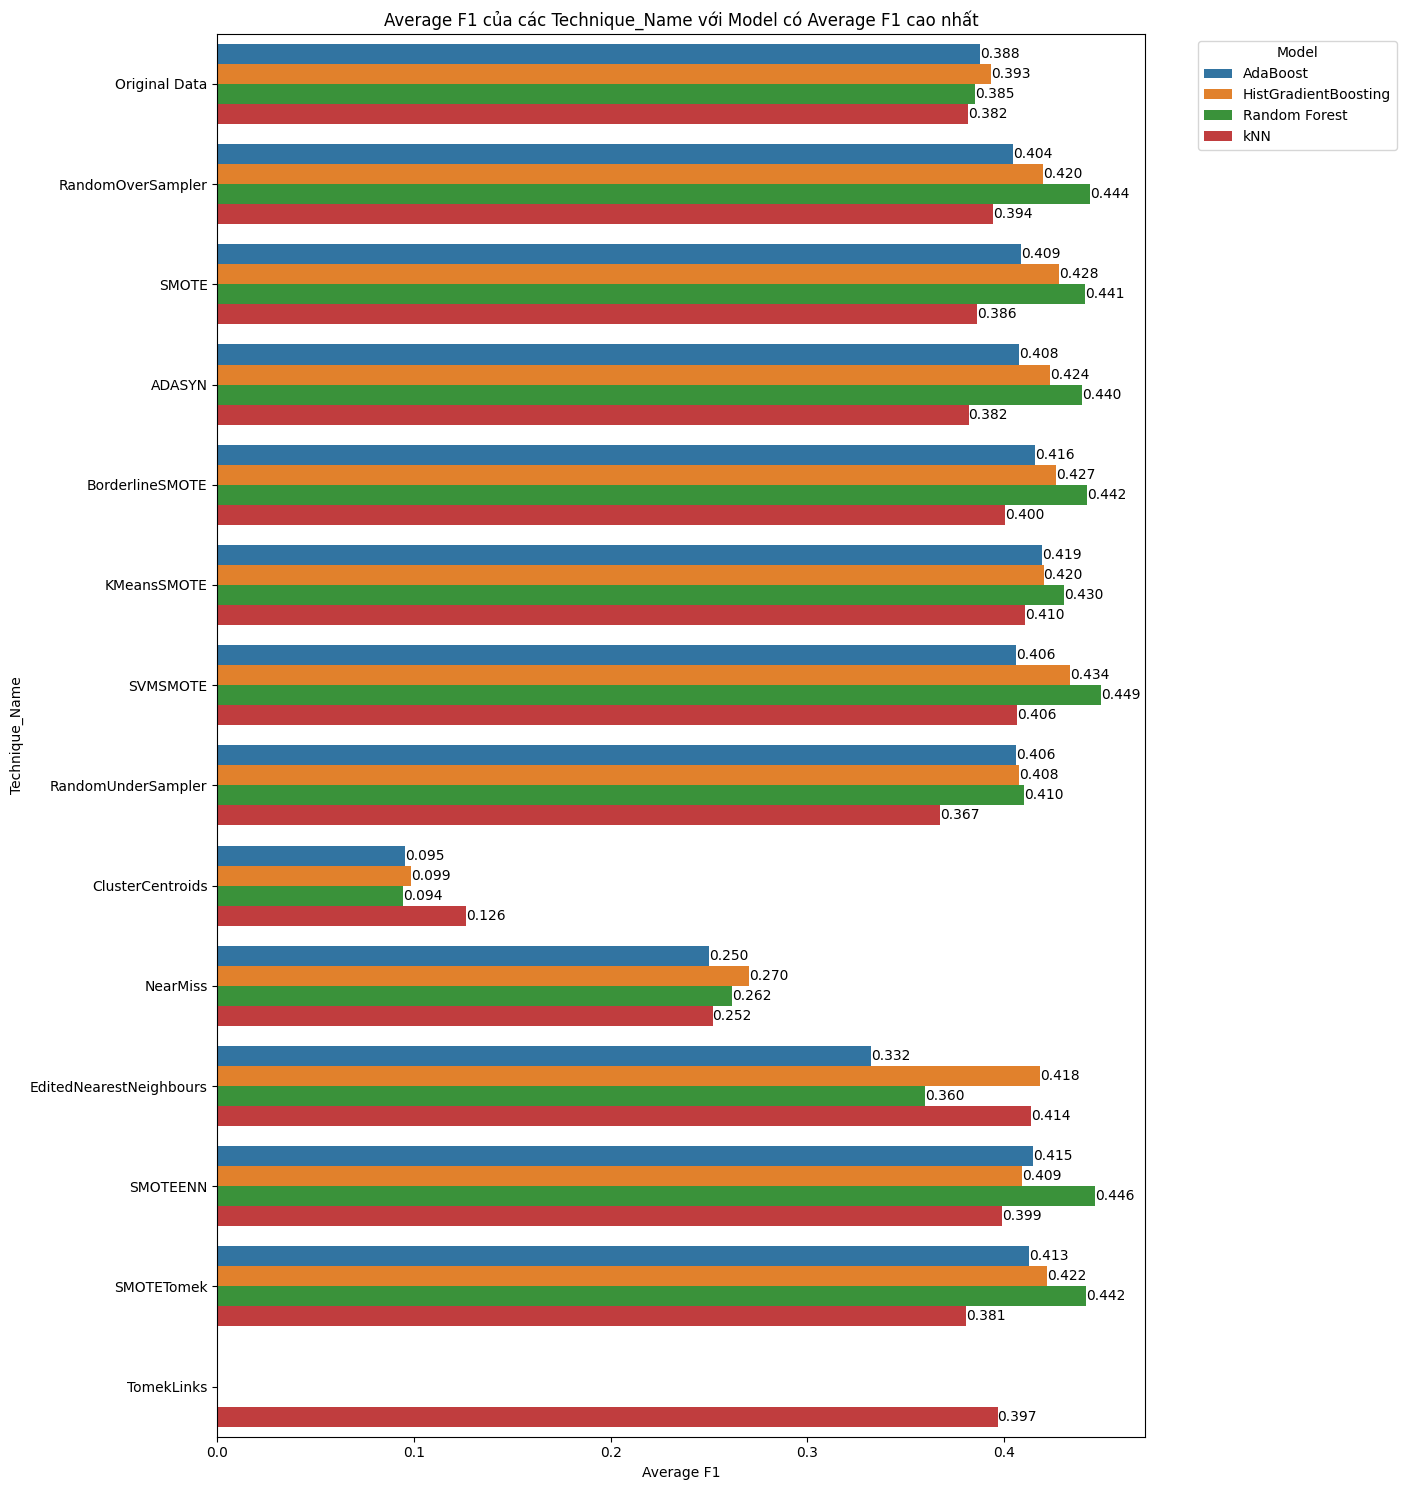

In [ ]:
fig, ax = plt.subplots(figsize=(18, 15))

sns.barplot(y='Technique_Name', x='Average F1', hue='Model', data=best_avg_f1_df, orient='h', ax=ax, order=technique_order)
ax.set_title('Average F1 của các Technique_Name với Model có Average F1 cao nhất')
ax.set_ylabel('Technique_Name')
ax.set_xlabel('Average F1')

ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()